In [1]:
## This notebook is used to average yearly geopotential data into case year data
## Also used to plot the case year data, and the case year compared to climatology

## created by Kendra Herweck

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob

## Climatological Avg

In [2]:
filename_list=[]
for i in range(1980,2021):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list,concat_dim='time')
print(combined_ds)


<xarray.Dataset>
Dimensions:  (time: 41, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.98e+03 1.981e+03 1.982e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [3]:
clim_avg = combined_ds.mean('time')
print(clim_avg['gpot'].values)

[[49905.48323171 49905.48323171 49905.48323171 ... 49905.48323171
  49905.48323171 49905.48323171]
 [49910.53353659 49910.53810976 49910.53810976 ... 49910.5625
  49910.5472561  49910.5472561 ]
 [49916.57469512 49916.55792683 49916.54420732 ... 49916.60518293
  49916.59908537 49916.57926829]
 ...
 [57458.75457317 57457.7804878  57456.91158537 ... 57461.39481707
  57460.50914634 57459.57012195]
 [57455.55487805 57454.70579268 57454.03963415 ... 57458.10518293
  57457.24237805 57456.55792683]
 [57452.48018293 57451.6554878  57450.91920732 ... 57454.82469512
  57454.13719512 57453.26371951]]


In [4]:
print(clim_avg)

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    gpot     (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


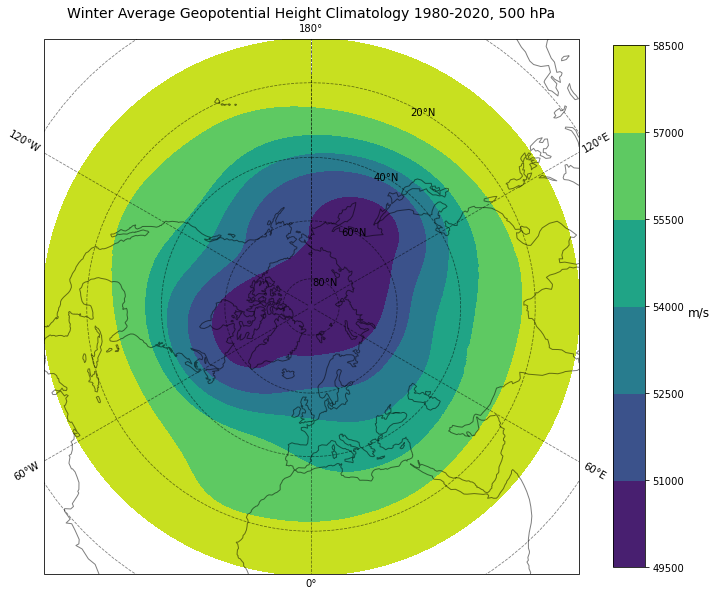

In [10]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind=clim_avg['gpot'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height Climatology 1980-2020, 500 hPa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC Years

In [6]:
filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
      1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 36, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.95e+03 1.951e+03 1.952e+03 ... 2.019e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [8]:
lowsic_avg = combined_ds.mean('time')
print(lowsic_avg['gpot'].values)

[[49846.90451389 49846.90451389 49846.90451389 ... 49846.90451389
  49846.90451389 49846.90451389]
 [49851.47048611 49851.45659722 49851.44791667 ... 49851.50347222
  49851.48958333 49851.48784722]
 [49856.99131944 49856.97222222 49856.93576389 ... 49857.05729167
  49857.03125    49857.01388889]
 ...
 [57392.87326389 57391.72569444 57390.69097222 ... 57396.00694444
  57394.93923611 57393.84027778]
 [57390.27777778 57389.25520833 57388.42534722 ... 57393.32118056
  57392.28819444 57391.43576389]
 [57387.81944444 57386.84201389 57385.93923611 ... 57390.65451389
  57389.80208333 57388.76041667]]


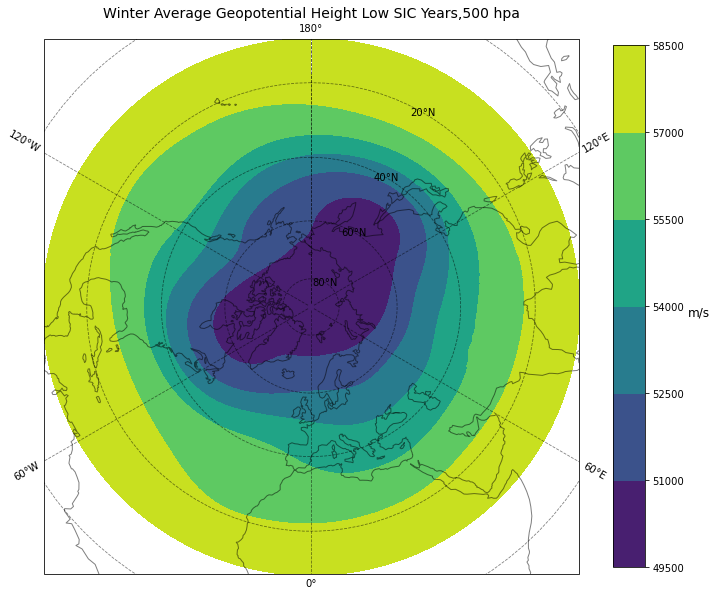

In [9]:
lat = lowsic_avg.variables['lat']
lon = lowsic_avg.variables['lon']

wind=lowsic_avg['gpot'][:,:]  

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height Low SIC Years,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Low SIC & EP Nino Avg

In [11]:
filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 7, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.977e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [12]:
lowsic_ep_avg = combined_ds.mean('time')
print(lowsic_ep_avg['gpot'].values)

[[50202.45535714 50202.45535714 50202.45535714 ... 50202.45535714
  50202.45535714 50202.45535714]
 [50210.01785714 50209.98214286 50209.99107143 ... 50210.10714286
  50210.0625     50210.07142857]
 [50218.32142857 50218.25892857 50218.1875     ... 50218.49107143
  50218.45535714 50218.375     ]
 ...
 [57440.99107143 57439.91964286 57438.97321429 ... 57443.83928571
  57442.875      57441.83928571]
 [57437.99107143 57437.02678571 57436.27678571 ... 57440.67857143
  57439.71428571 57438.98214286]
 [57435.0625     57434.14285714 57433.34821429 ... 57437.52678571
  57436.76785714 57435.88392857]]


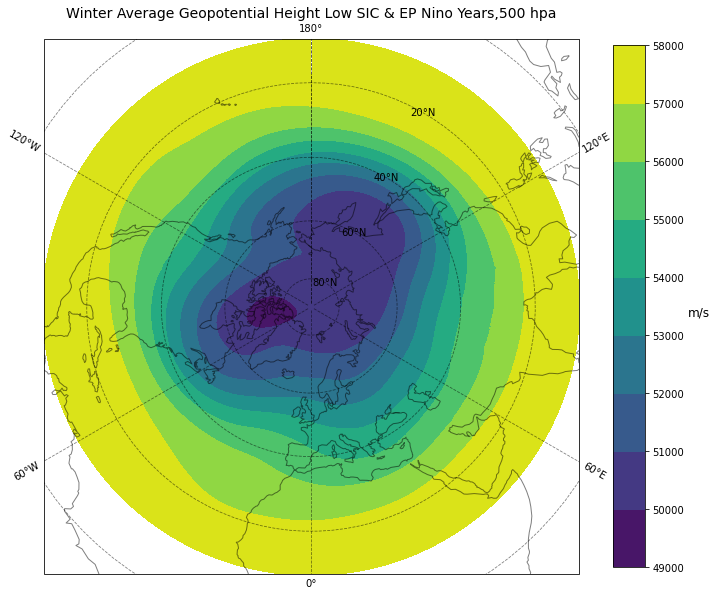

In [13]:
lat = lowsic_ep_avg.variables['lat']
lon = lowsic_ep_avg.variables['lon']

wind=lowsic_ep_avg['gpot'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height Low SIC & EP Nino Years,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## Low SIC & CP Nino Avg

In [14]:
#Years: 1958,1959,1964,1966,1995,2005,2010,2015,2016,2020

filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 10, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.958e+03 1.959e+03 1.964e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [15]:
lowsic_cp_avg = combined_ds.mean('time')
print(lowsic_cp_avg['gpot'].values)

[[49964.0375  49964.0375  49964.0375  ... 49964.0375  49964.0375
  49964.0375 ]
 [49968.3     49968.25625 49968.23125 ... 49968.31875 49968.3
  49968.3125 ]
 [49973.55625 49973.54375 49973.51875 ... 49973.66875 49973.63125
  49973.6    ]
 ...
 [57467.56875 57466.475   57465.475   ... 57470.4125  57469.4625
  57468.45   ]
 [57464.29375 57463.33125 57462.525   ... 57467.10625 57466.18125
  57465.375  ]
 [57461.10625 57460.20625 57459.325   ... 57463.76875 57463.0125
  57462.01875]]


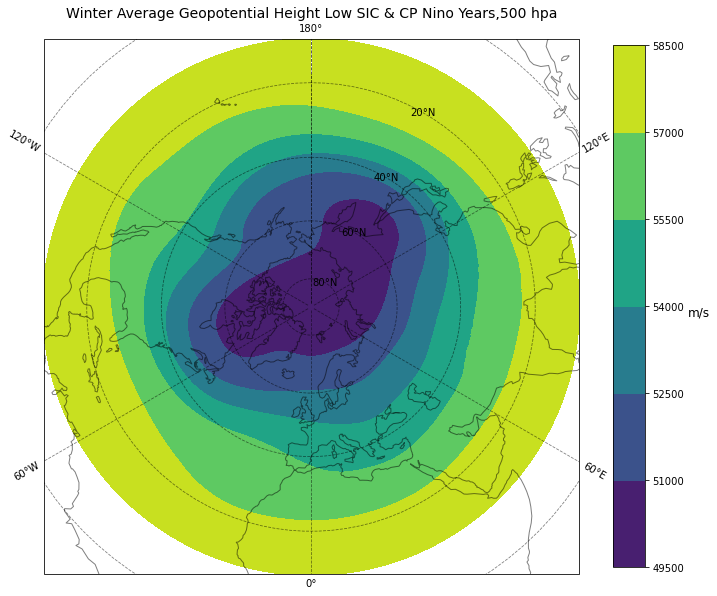

In [16]:
lat = lowsic_cp_avg.variables['lat']
lon = lowsic_cp_avg.variables['lon']

wind=lowsic_cp_avg['gpot'][:,:]  

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height Low SIC & CP Nino Years,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All CP Nino Years

In [17]:
##Years: 1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020

filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)


<xarray.Dataset>
Dimensions:  (time: 16, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.954e+03 1.958e+03 1.959e+03 ... 2.016e+03 2.02e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [18]:
cp_avg = combined_ds.mean('time')
print(cp_avg['gpot'].values)

[[49853.21875    49853.21875    49853.21875    ... 49853.21875
  49853.21875    49853.21875   ]
 [49857.328125   49857.3125     49857.3046875  ... 49857.32421875
  49857.3125     49857.34375   ]
 [49862.41015625 49862.40234375 49862.40625    ... 49862.4296875
  49862.41796875 49862.40625   ]
 ...
 [57442.34765625 57441.27734375 57440.30859375 ... 57445.18359375
  57444.21875    57443.203125  ]
 [57439.265625   57438.33203125 57437.55859375 ... 57442.03125
  57441.109375   57440.33203125]
 [57436.2890625  57435.390625   57434.55078125 ... 57438.87109375
  57438.12109375 57437.171875  ]]


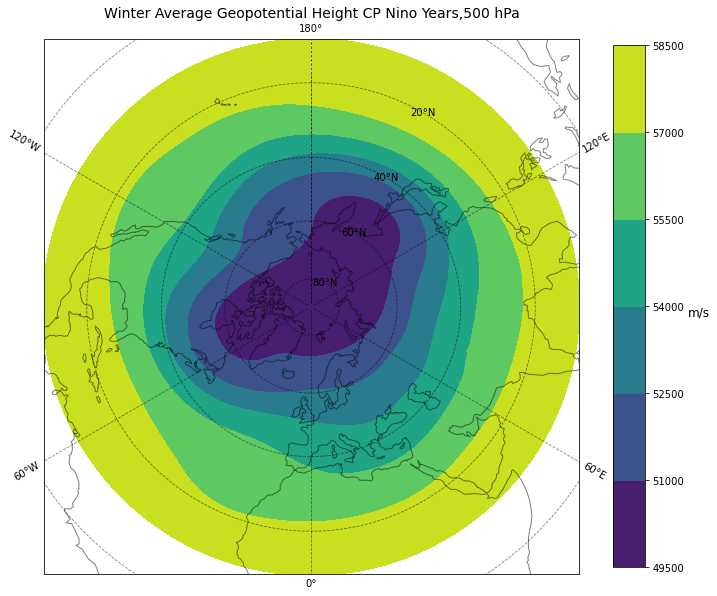

In [19]:
lat = cp_avg.variables['lat']
lon = cp_avg.variables['lon']

wind=cp_avg['gpot'][:,:]  


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height CP Nino Years,500 hPa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## All EP Nino Years

In [20]:
##Years: 1952,1970,1973,1977,1983,1987,1998,2007,2012

filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Geopotential-Data/ERA/Yearly/ERA-GeopotentialHeight-{}.nc'.format(i)
    filename_list.append(filename)

#print(filename_list)
combined_ds = xr.open_mfdataset(filename_list)
print(combined_ds)

<xarray.Dataset>
Dimensions:  (time: 9, x: 1440, y: 321)
Coordinates:
  * time     (time) float64 1.952e+03 1.97e+03 1.973e+03 ... 2.007e+03 2.012e+03
Dimensions without coordinates: x, y
Data variables:
    lat      (time, y) float64 dask.array<chunksize=(1, 321), meta=np.ndarray>
    lon      (time, x) float64 dask.array<chunksize=(1, 1440), meta=np.ndarray>
    gpot     (time, y, x) float64 dask.array<chunksize=(1, 321, 1440), meta=np.ndarray>


In [21]:
ep_avg = combined_ds.mean('time')
print(ep_avg['gpot'].values)

[[50065.18055556 50065.18055556 50065.18055556 ... 50065.18055556
  50065.18055556 50065.18055556]
 [50073.40972222 50073.40277778 50073.41666667 ... 50073.46527778
  50073.42361111 50073.45138889]
 [50082.43055556 50082.38888889 50082.36111111 ... 50082.5
  50082.49305556 50082.45833333]
 ...
 [57443.8125     57442.625      57441.53472222 ... 57447.03472222
  57445.95138889 57444.79166667]
 [57440.85416667 57439.77083333 57438.90277778 ... 57443.89583333
  57442.84027778 57441.96527778]
 [57437.98611111 57436.94444444 57436.02777778 ... 57440.78472222
  57439.9375     57438.92361111]]


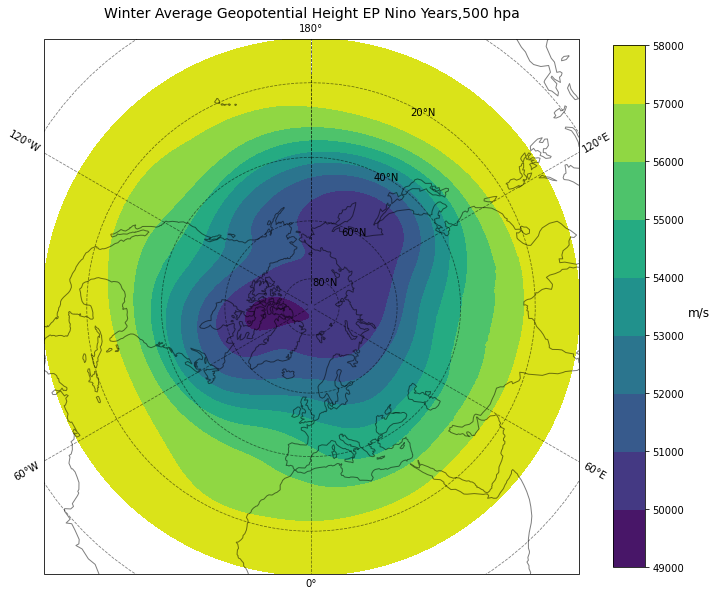

In [22]:
lat = ep_avg.variables['lat']
lon = ep_avg.variables['lon']

wind=ep_avg['gpot'][:,:] 

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-4, 4, 11)
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree())
plt.title('Winter Average Geopotential Height EP Nino Years,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Difference Plots

### Low SIC - Climatology

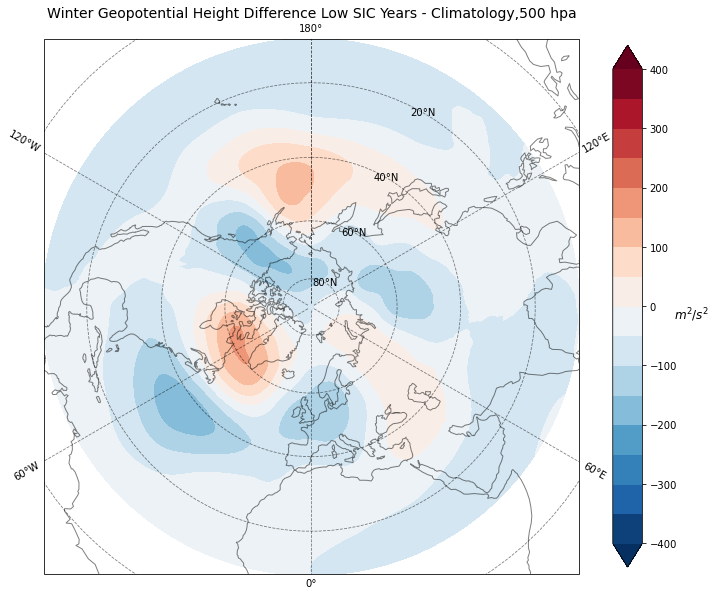

In [50]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['gpot'][:,:]  ## 
wind2=lowsic_avg['gpot'][:,:]  ## 
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Height Difference Low SIC Years - Climatology,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### EP Nino - Climatology

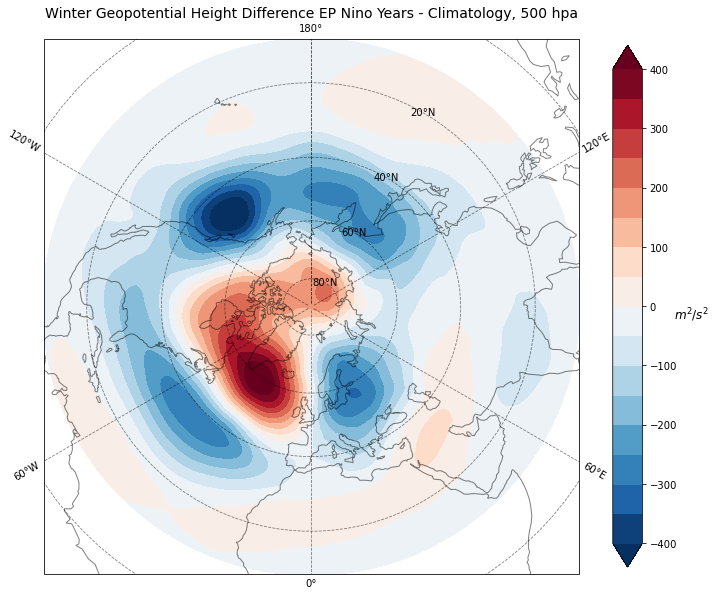

In [51]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['gpot'][:,:]  ## 
wind2=ep_avg['gpot'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Height Difference EP Nino Years - Climatology, 500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### CP Nino - Climatology

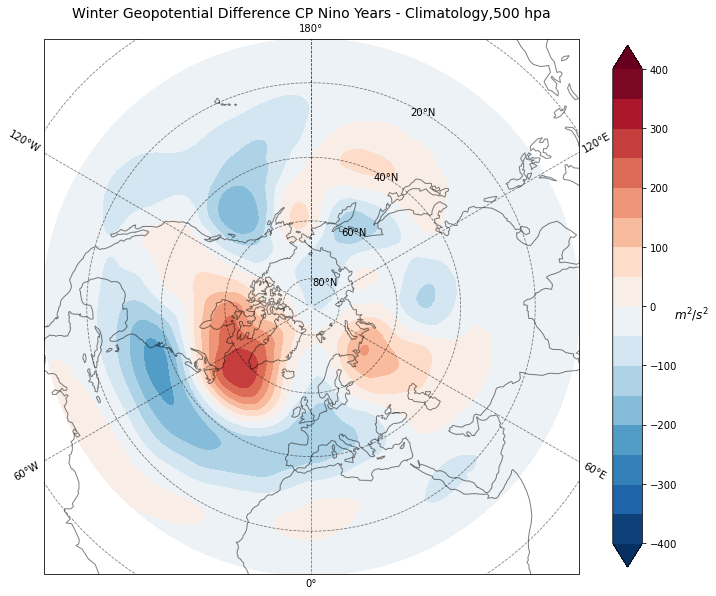

In [52]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['gpot'][:,:]  ## 
wind2=cp_avg['gpot'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Difference CP Nino Years - Climatology,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & EP Nino - Climatology

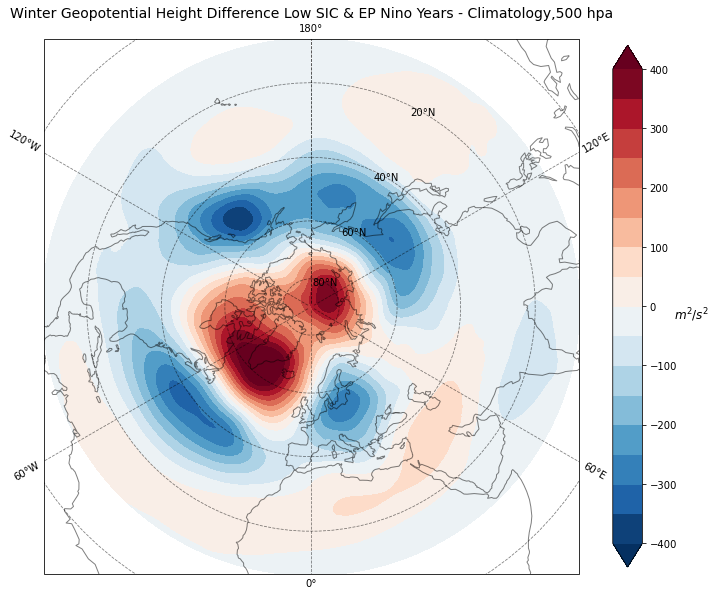

In [53]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['gpot'][:,:]  ## 
wind2=lowsic_ep_avg['gpot'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Height Difference Low SIC & EP Nino Years - Climatology,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

### Low SIC & CP Nino - Climatology

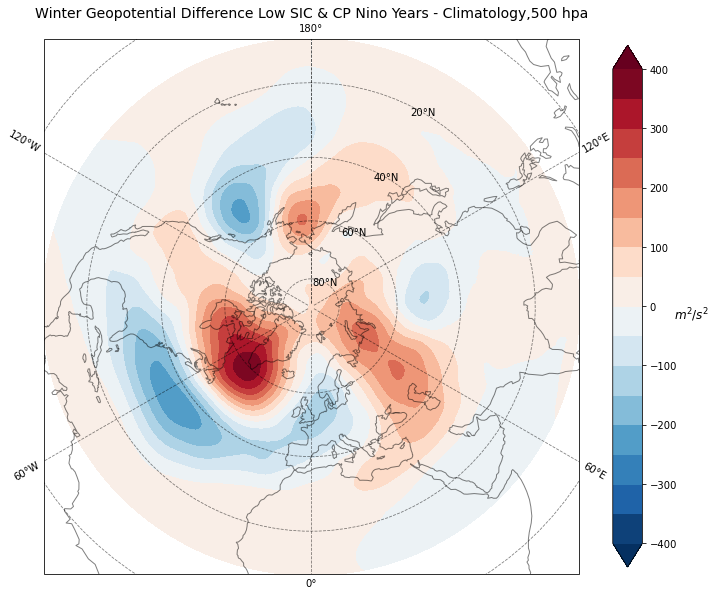

In [54]:
lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']

wind1=clim_avg['gpot'][:,:]  ## 
wind2=lowsic_cp_avg['gpot'][:,:]  ##
wind = wind2-wind1   ##


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-400, 400, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
plt.title('Winter Geopotential Difference Low SIC & CP Nino Years - Climatology,500 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

# Diffrence Plots - US Focus

### Low SIC - Climatology

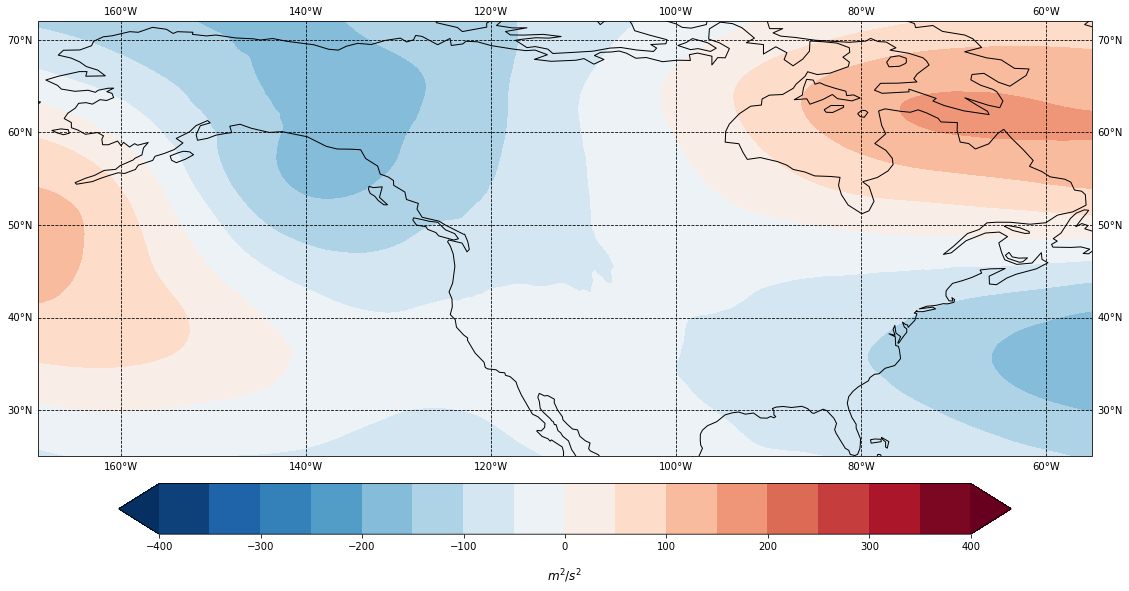

In [72]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### EP Nino - Climatology

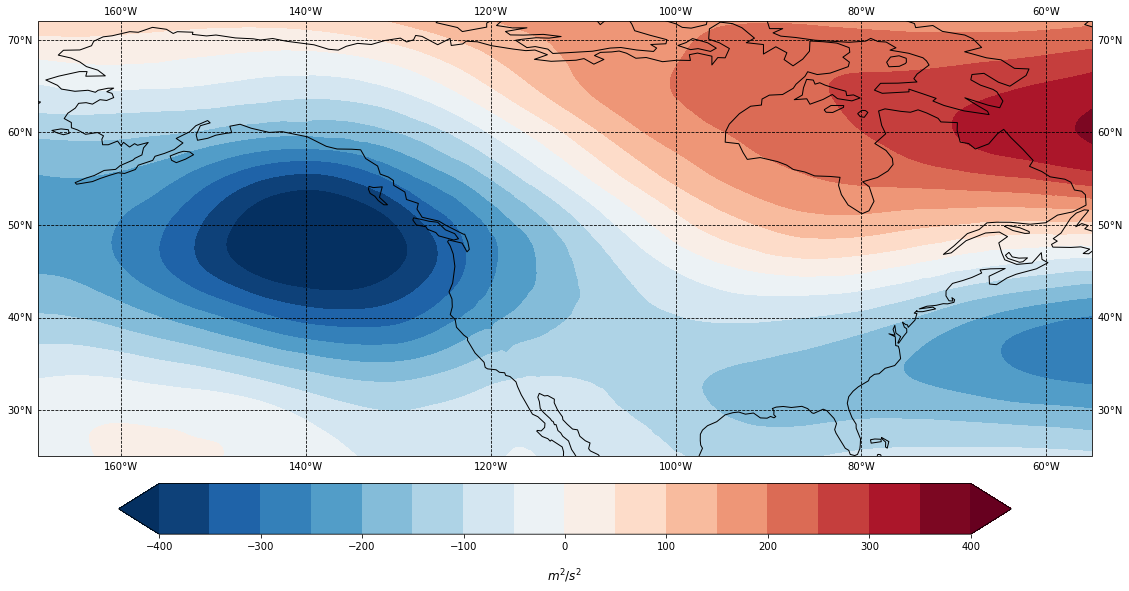

In [68]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### CP Nino - Climatology

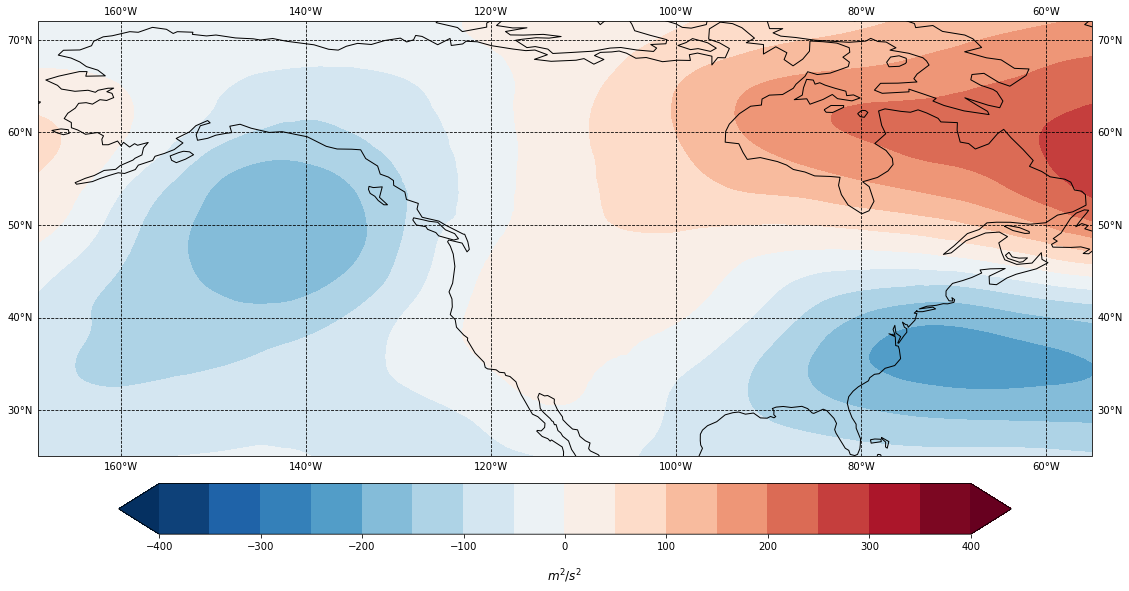

In [69]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & EP Nino - Climatology

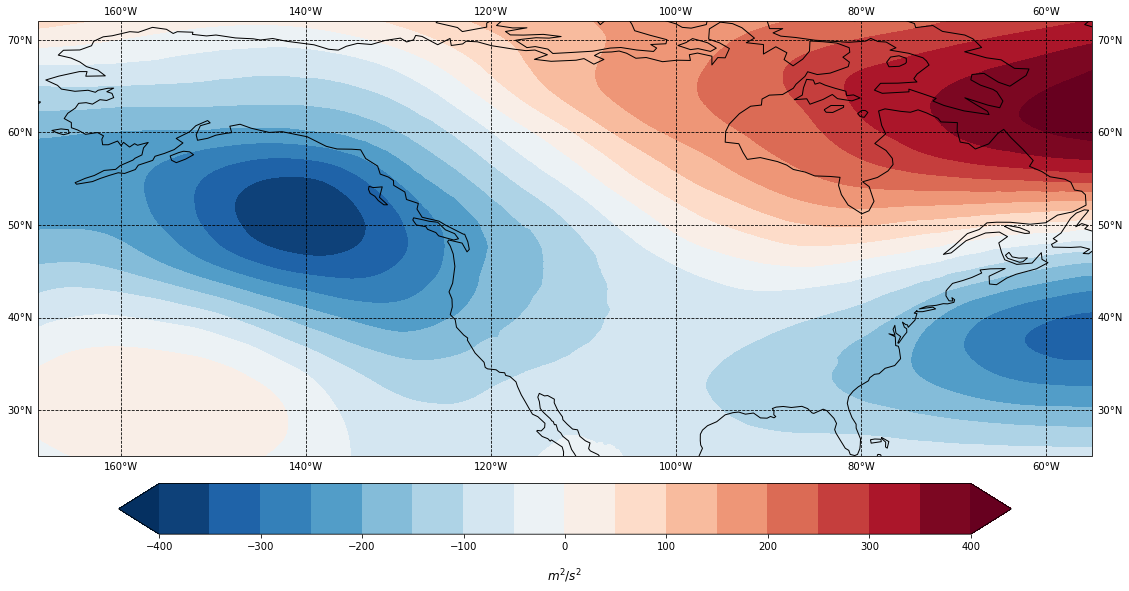

In [70]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

### Low SIC & CP Nino - Climatology

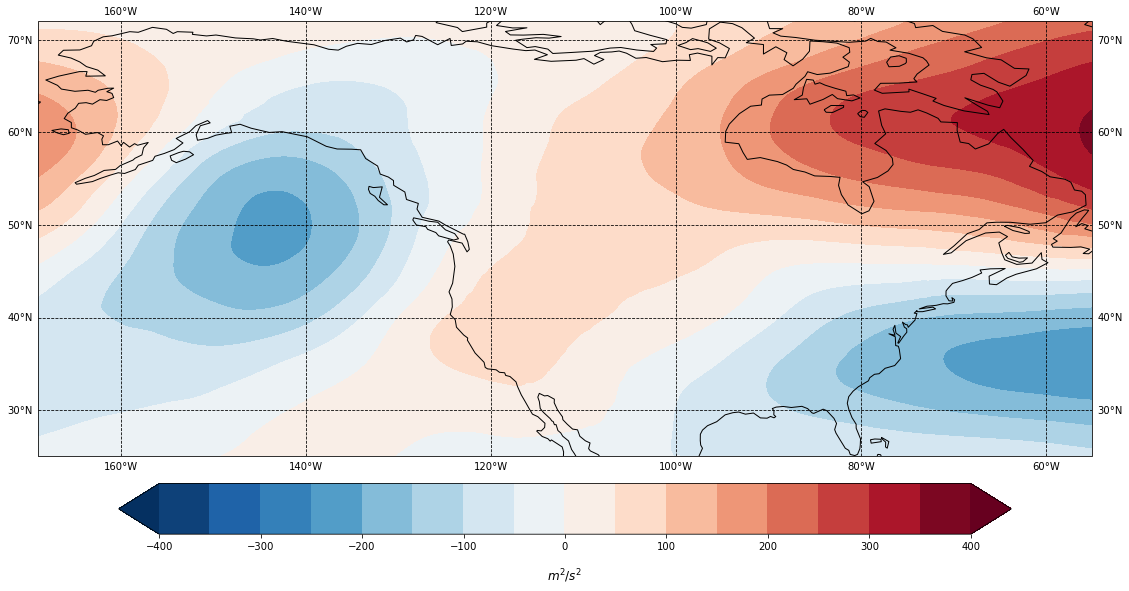

In [71]:
#f = nc.Dataset('ElNino_LowSICYears_Temp_detrended-data.nc', 'r')  #low sic & el nino years
#f2=nc.Dataset('Climatological_Temp_detrended-data.nc','r')  #climatology

lat = clim_avg.variables['lat']
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

# Geopotential Plots w/ SLP on top

### Low SIC - Climatology

In [79]:
## SLP variable

filename_list=[]
for i in (1950,1951,1952,1955,1958,1959,1961,1964,1966,1968,1970,1971,1974,1976,1977,1979,1981,1984,1987,1989,1990,1993,
      1995,1997,1998,1999,2002,2005,2007,2010,2011,2012,2015,2016,2019,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

combined_ds = xr.open_mfdataset(filename_list)

slp_lowsic_avg = combined_ds.mean('time')
print(slp_lowsic_avg)


press=slp_lowsic_avg['slp'][:,:]  

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    slp      (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


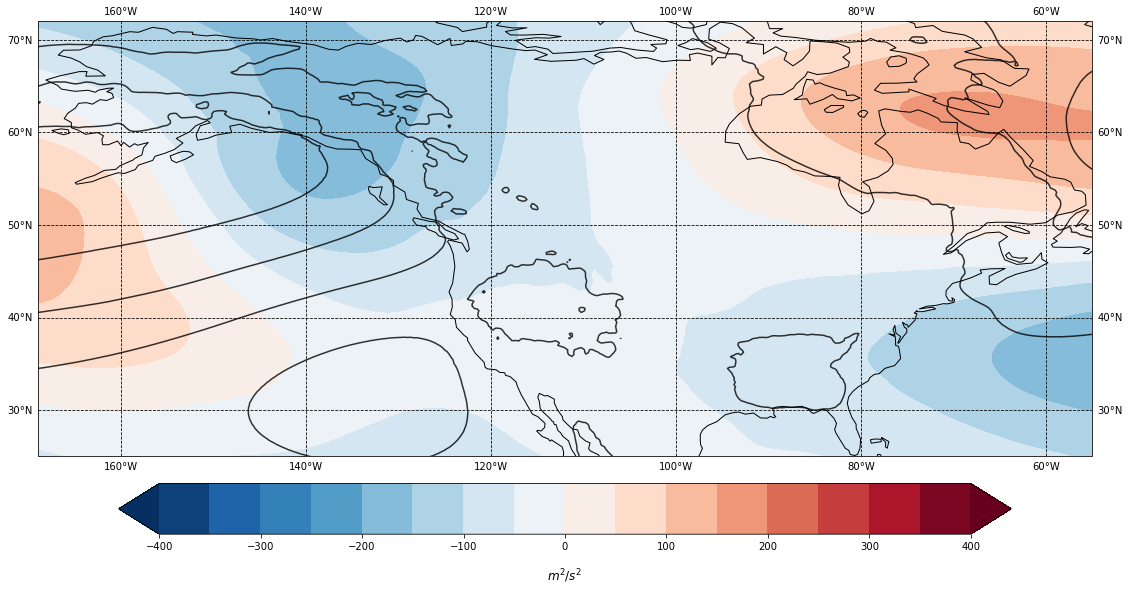

In [80]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

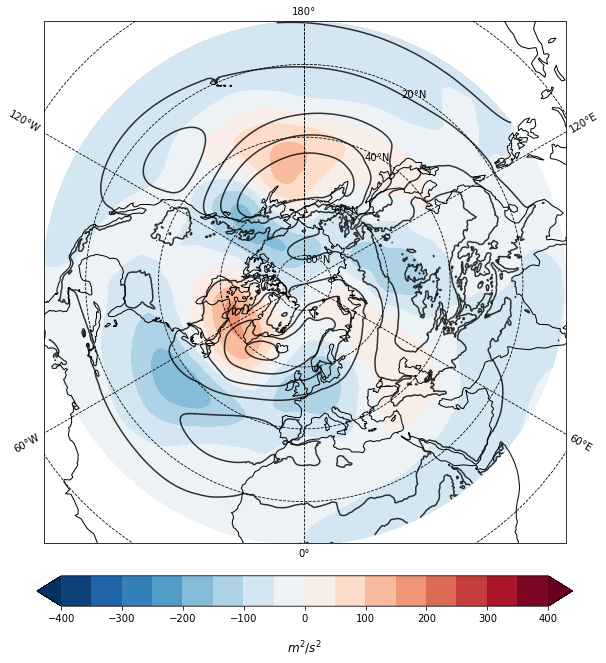

In [84]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

### EP Nino - Climatology

In [86]:
### SLP Variable

filename_list=[]
for i in (1952,1970,1973,1977,1983,1987,1998,2007,2012):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

combined_ds = xr.open_mfdataset(filename_list)

slp_ep_avg = combined_ds.mean('time')
print(slp_ep_avg)


press=slp_ep_avg['slp'][:,:]  

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    slp      (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


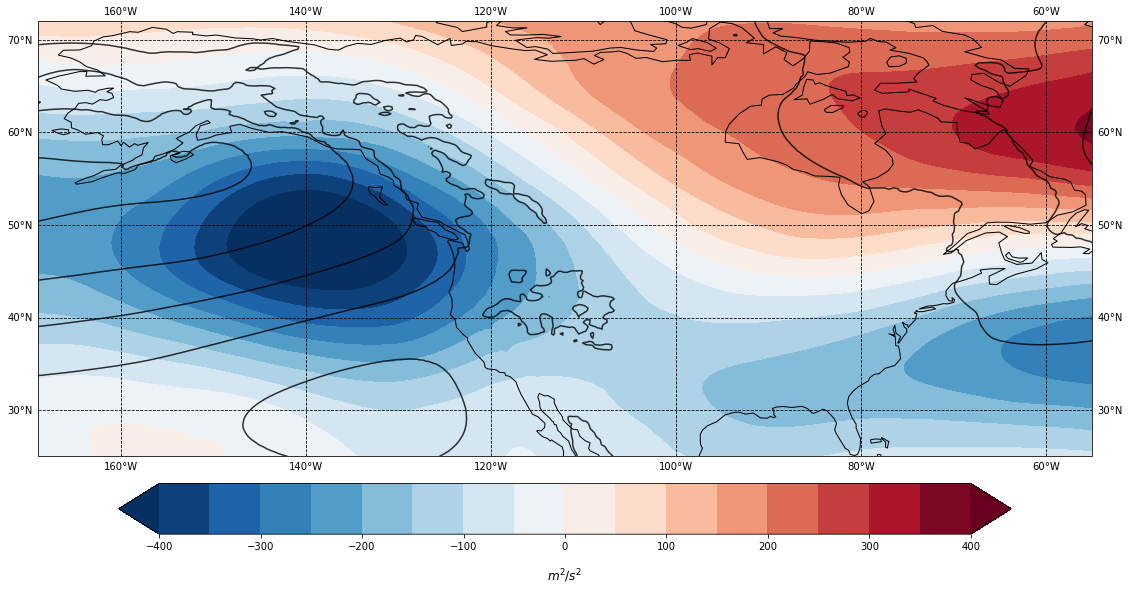

In [87]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

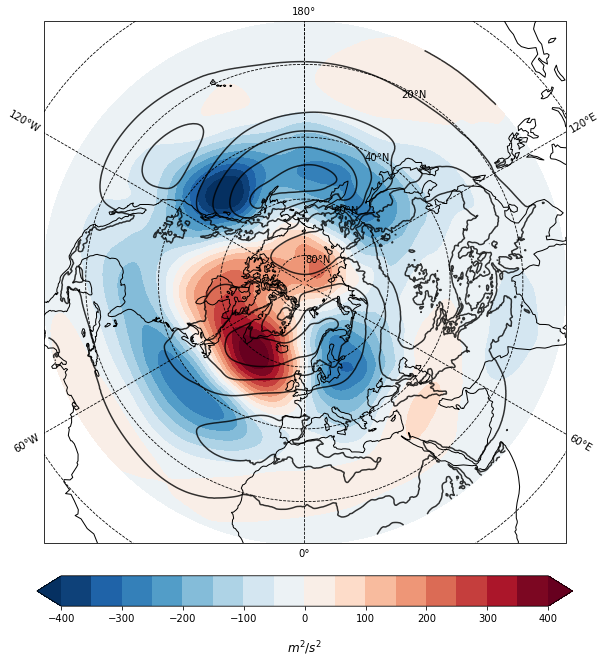

In [88]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

### CP Nino - Climatology

In [89]:
### SLP Variable

filename_list=[]
for i in (1954,1958,1959,1964,1966,1969,1978,1988,1992,1995,2003,2005,2010,2015,2016,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

combined_ds = xr.open_mfdataset(filename_list)

slp_cp_avg = combined_ds.mean('time')
print(slp_cp_avg)


press=slp_cp_avg['slp'][:,:]  

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    slp      (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


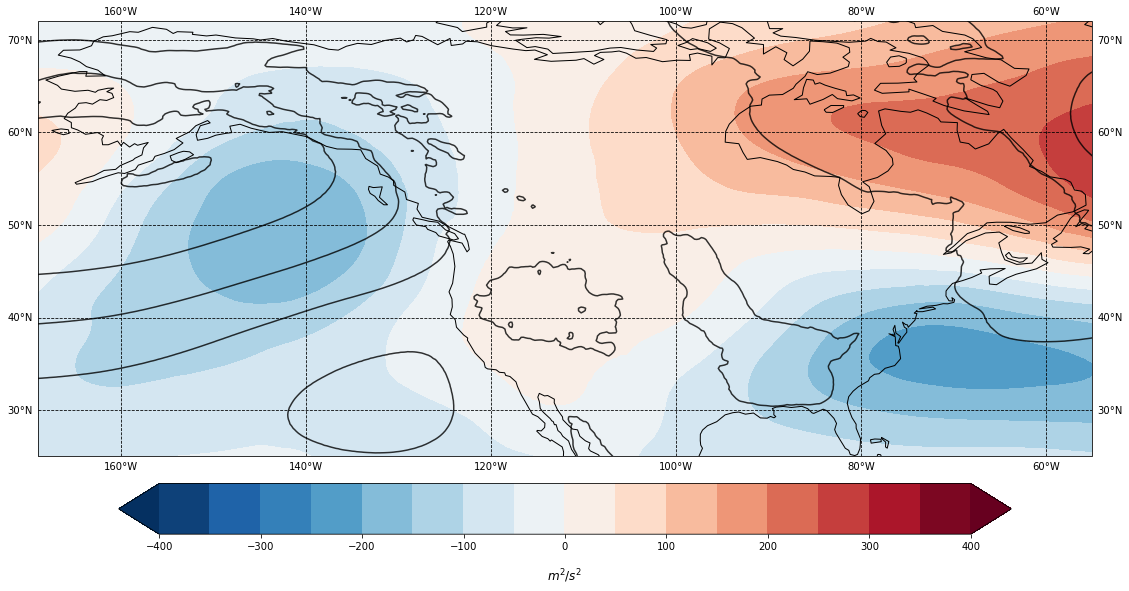

In [90]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

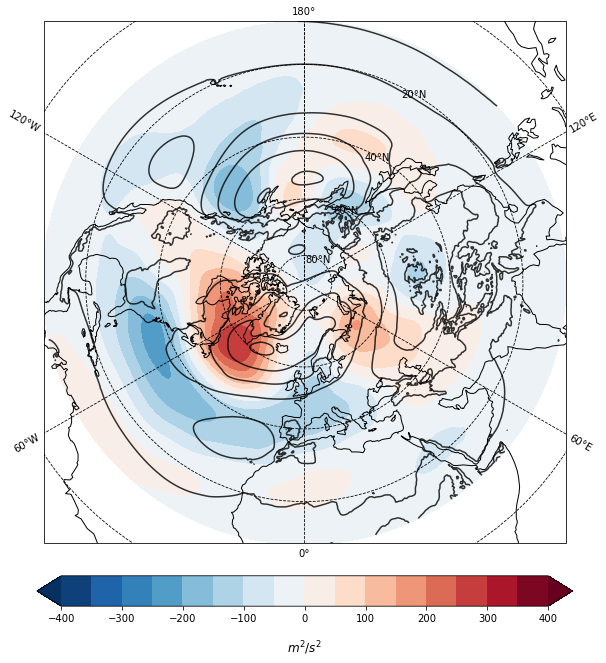

In [91]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

### Low SIC & EP Nino - Climatology

In [92]:
### SLP Variable

filename_list=[]
for i in (1952,1970,1977,1987,1998,2007,2012):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

combined_ds = xr.open_mfdataset(filename_list)

slp_cp_avg = combined_ds.mean('time')
print(slp_cp_avg)


press=slp_cp_avg['slp'][:,:]  

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    slp      (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


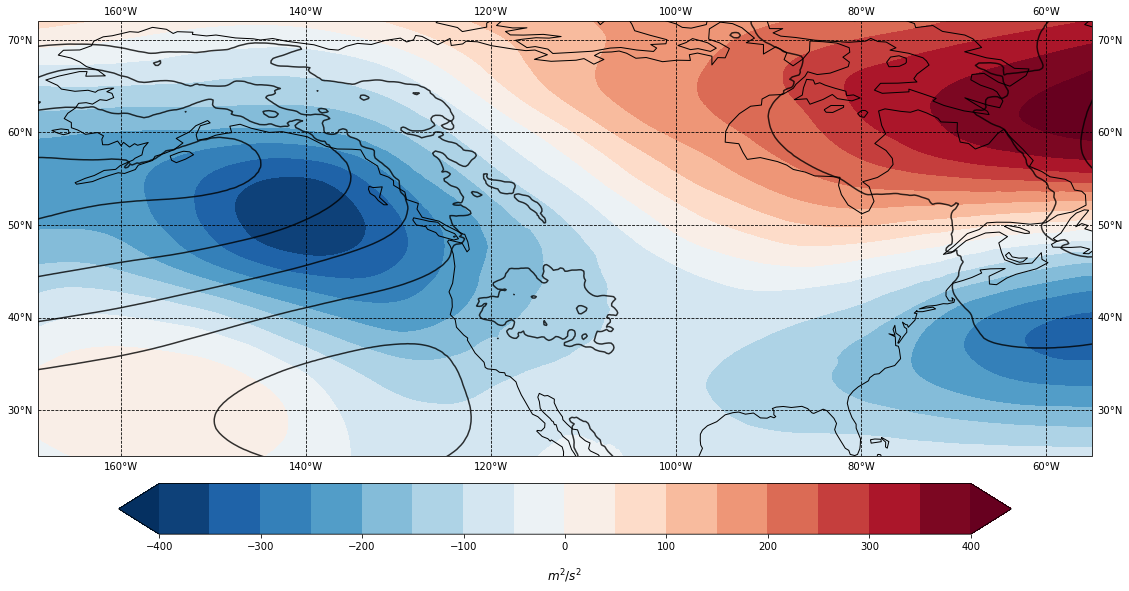

In [93]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

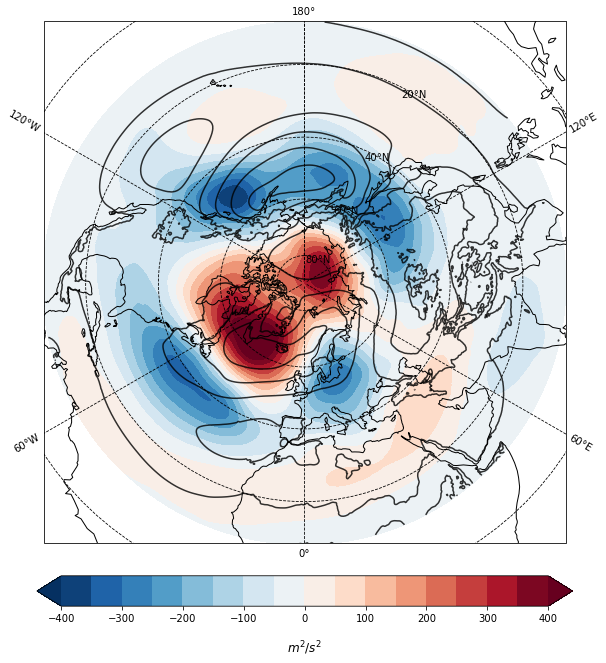

In [94]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_ep_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

### Low SIC & CP Nino - Climatology

In [98]:
### SLP Variable

filename_list=[]
for i in (1958,1959,1964,1966,1995,2005,2010,2015,2016,2020):
    filename = 'Data/Sea-Level-Pressure/ERA/Yearly/ERA-SLP-{}.nc'.format(i)
    filename_list.append(filename)

combined_ds = xr.open_mfdataset(filename_list)

slp_cp_avg = combined_ds.mean('time')
print(slp_cp_avg)


press=slp_cp_avg['slp'][:,:]  

<xarray.Dataset>
Dimensions:  (x: 1440, y: 321)
Dimensions without coordinates: x, y
Data variables:
    lat      (y) float64 dask.array<chunksize=(321,), meta=np.ndarray>
    lon      (x) float64 dask.array<chunksize=(1440,), meta=np.ndarray>
    slp      (y, x) float64 dask.array<chunksize=(321, 1440), meta=np.ndarray>


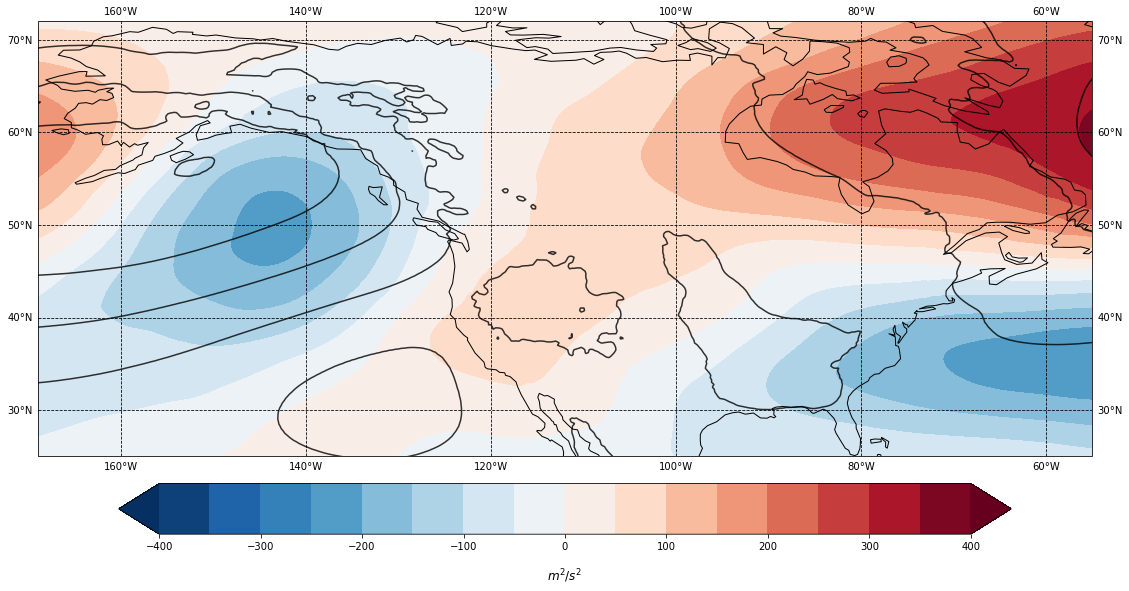

In [99]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-169,-55,25,72],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="horizontal",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)

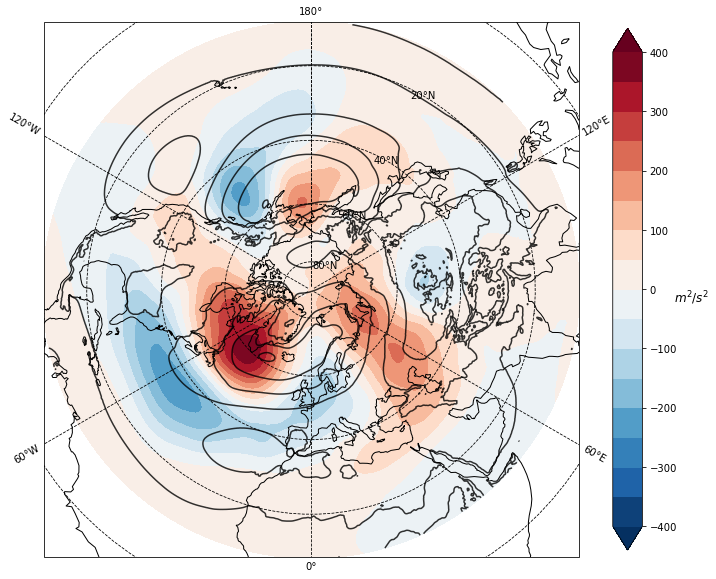

In [100]:
## Geopotential variables 

lat = clim_avg.variables['lat'] 
lon = clim_avg.variables['lon']


gpot1=clim_avg['gpot'][:,:]  ## 
gpot2=lowsic_cp_avg['gpot'][:,:]  ##
gpot = gpot2-gpot1   ##



fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black',draw_labels=True)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels=np.linspace(-400,400,17)
plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, gpot,transform=ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
cb = plt.colorbar(ax=ax, orientation="vertical",pad=0.05, aspect=16, shrink=0.8)
cb.set_label(r'$m^2/s^2$',size=12,rotation=0,labelpad=15)
#cs=plt.contour(lons,lats,climwind,colors='black',transform=ccrs.PlateCarree())
#plt.clabel(cs, fontsize=9, inline=True)
#plt.title('Average Winter Temperature Difference (Low SIC vs.Climatological Avg 1980-2020)', size=14)
#cs=plt.contour(lons,lats,climwind30,colors='black',transform=ccrs.PlateCarree())

plt.contour(lons,lats,press,transform=ccrs.PlateCarree(),colors='black',alpha=0.8)